In [1]:
import sys
sys.path.append('../')

from src.m4_generator import M4Generator
from src.m4_data_loader import M4DataLoader
from src.error_functions import *
from src.visualization import *
from src.evaluation import *
from src.m4_model import M4Model


import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

Using TensorFlow backend.


# Load Data

In [2]:
EPOCHS = 100
BATCH_SIZE = 50
LOOKBACK = 96
HORIZON = 48
HIDDEN_LAYER_SIZE = 50
LOSS = smape

data_loader = M4DataLoader("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  LOOKBACK, HORIZON,  validation_ratio=0.05)

train_x, train_y = data_loader.get_training_data()
test_x, test_y = data_loader.get_test_data()
validate_x, validate_y = data_loader.get_validation_data()

training_data_generator = M4Generator(train_x, train_y, BATCH_SIZE)
test_data_generator = M4Generator(test_x, test_y, BATCH_SIZE)
validation_data_generator = M4Generator(validate_x, validate_y, BATCH_SIZE)

# Train The Model

In [3]:
model = M4Model(hidden_layer_size=HIDDEN_LAYER_SIZE, batch_size=BATCH_SIZE, lookback=LOOKBACK, 
        horizon=HORIZON, learning_rate=0.001, loss = LOSS, dropout_ratio = 0.5)

model.train(training_data_generator, test_data_generator, epochs=EPOCHS)

hist = model.evaluate(validation_data_generator)
print(hist)

Epoch 1/100
60/60 [==============================] - 8s 132ms/step - loss: 106.4270 - val_loss: 88.4717
Epoch 2/100
60/60 [==============================] - 7s 120ms/step - loss: 84.1486 - val_loss: 87.0349
Epoch 3/100
60/60 [==============================] - 7s 123ms/step - loss: 74.6795 - val_loss: 79.5411
Epoch 4/100
60/60 [==============================] - 7s 120ms/step - loss: 69.5825 - val_loss: 73.4844
Epoch 5/100
60/60 [==============================] - 7s 123ms/step - loss: 66.1313 - val_loss: 68.8678
Epoch 6/100
60/60 [==============================] - 7s 121ms/step - loss: 62.3879 - val_loss: 67.0294
Epoch 7/100
60/60 [==============================] - 7s 115ms/step - loss: 60.3160 - val_loss: 63.0382
Epoch 8/100
60/60 [==============================] - 7s 115ms/step - loss: 59.0022 - val_loss: 62.9069
Epoch 9/100
60/60 [==============================] - 7s 115ms/step - loss: 58.2251 - val_loss: 60.8653
Epoch 10/100
60/60 [==============================] - 7s 116ms/step - lo

Epoch 80/100
60/60 [==============================] - 8s 131ms/step - loss: 49.1069 - val_loss: 52.4690
Epoch 81/100
60/60 [==============================] - 8s 131ms/step - loss: 48.8433 - val_loss: 51.6299
Epoch 82/100
60/60 [==============================] - 8s 130ms/step - loss: 48.8700 - val_loss: 54.5887
Epoch 83/100
60/60 [==============================] - 8s 126ms/step - loss: 48.8844 - val_loss: 52.3129
Epoch 84/100
60/60 [==============================] - 8s 137ms/step - loss: 48.7618 - val_loss: 57.8020
Epoch 85/100
60/60 [==============================] - 8s 131ms/step - loss: 48.7019 - val_loss: 51.7603
Epoch 86/100
60/60 [==============================] - 8s 133ms/step - loss: 48.7871 - val_loss: 52.4391
Epoch 87/100
60/60 [==============================] - 10s 174ms/step - loss: 48.6990 - val_loss: 53.9574
Epoch 88/100
60/60 [==============================] - 9s 149ms/step - loss: 48.4433 - val_loss: 55.4992
Epoch 89/100
60/60 [==============================] - 8s 126ms/

# Save The Model

In [8]:
model.save('../models')

Saved model files to disk under../models/11


# Get Best And Worst Predictions

11.808003303101419
148.54357340193576


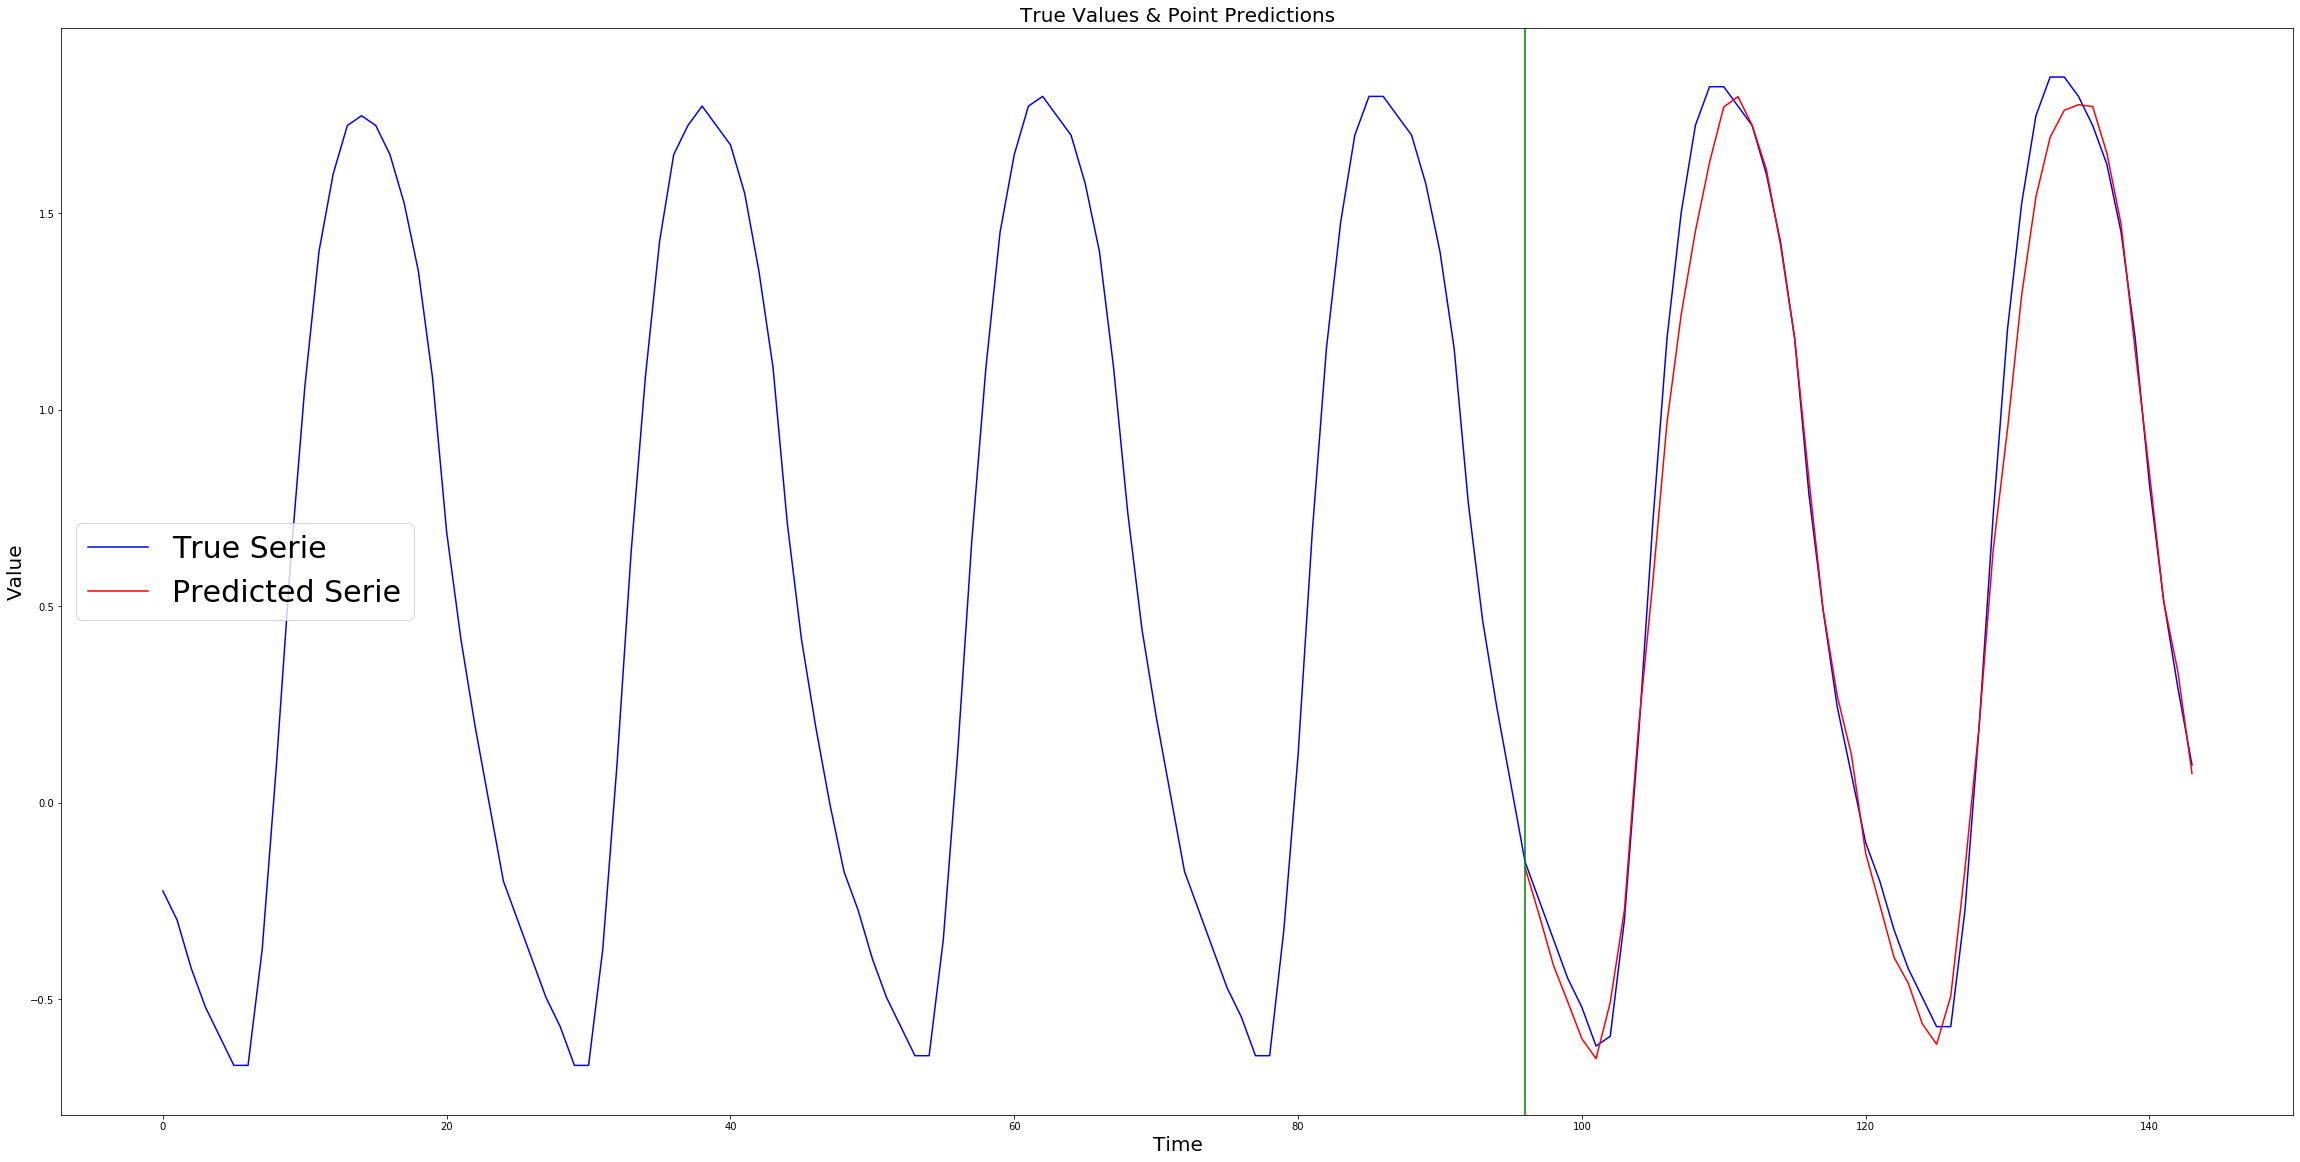

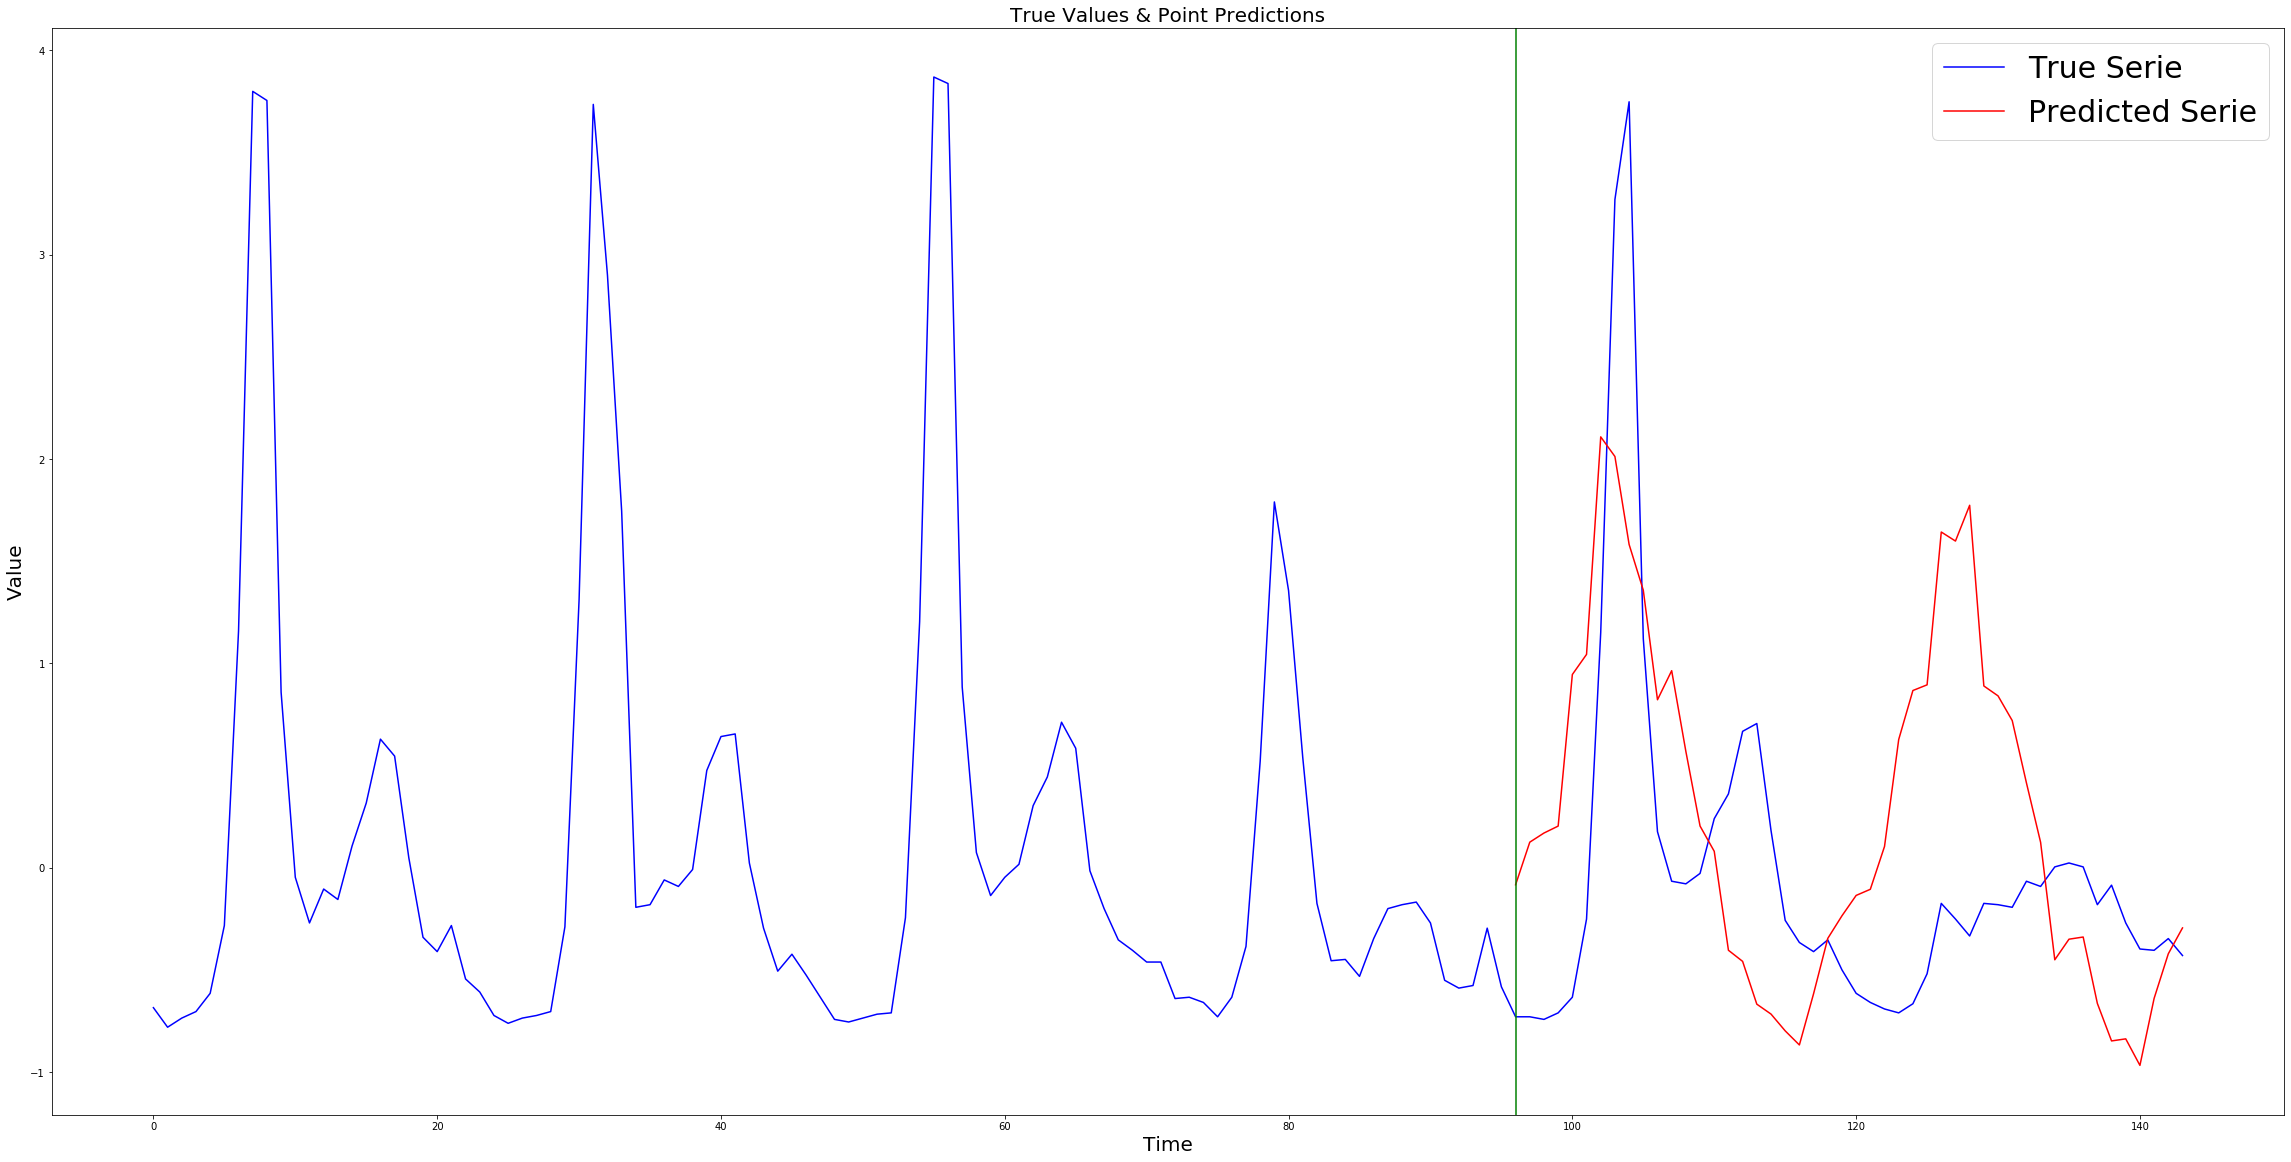

In [6]:
x, y, prediction, error =  sort_by_prediction_error(model, test_x, test_y, smape)

print(error[0])
plot_serie_and_prediction(x, y, prediction, serie_indx=0)

print(error[x.shape[0]-1])
plot_serie_and_prediction(x, y, prediction, serie_indx= x.shape[0]-1)

# PLot Specific Serie From A Batch

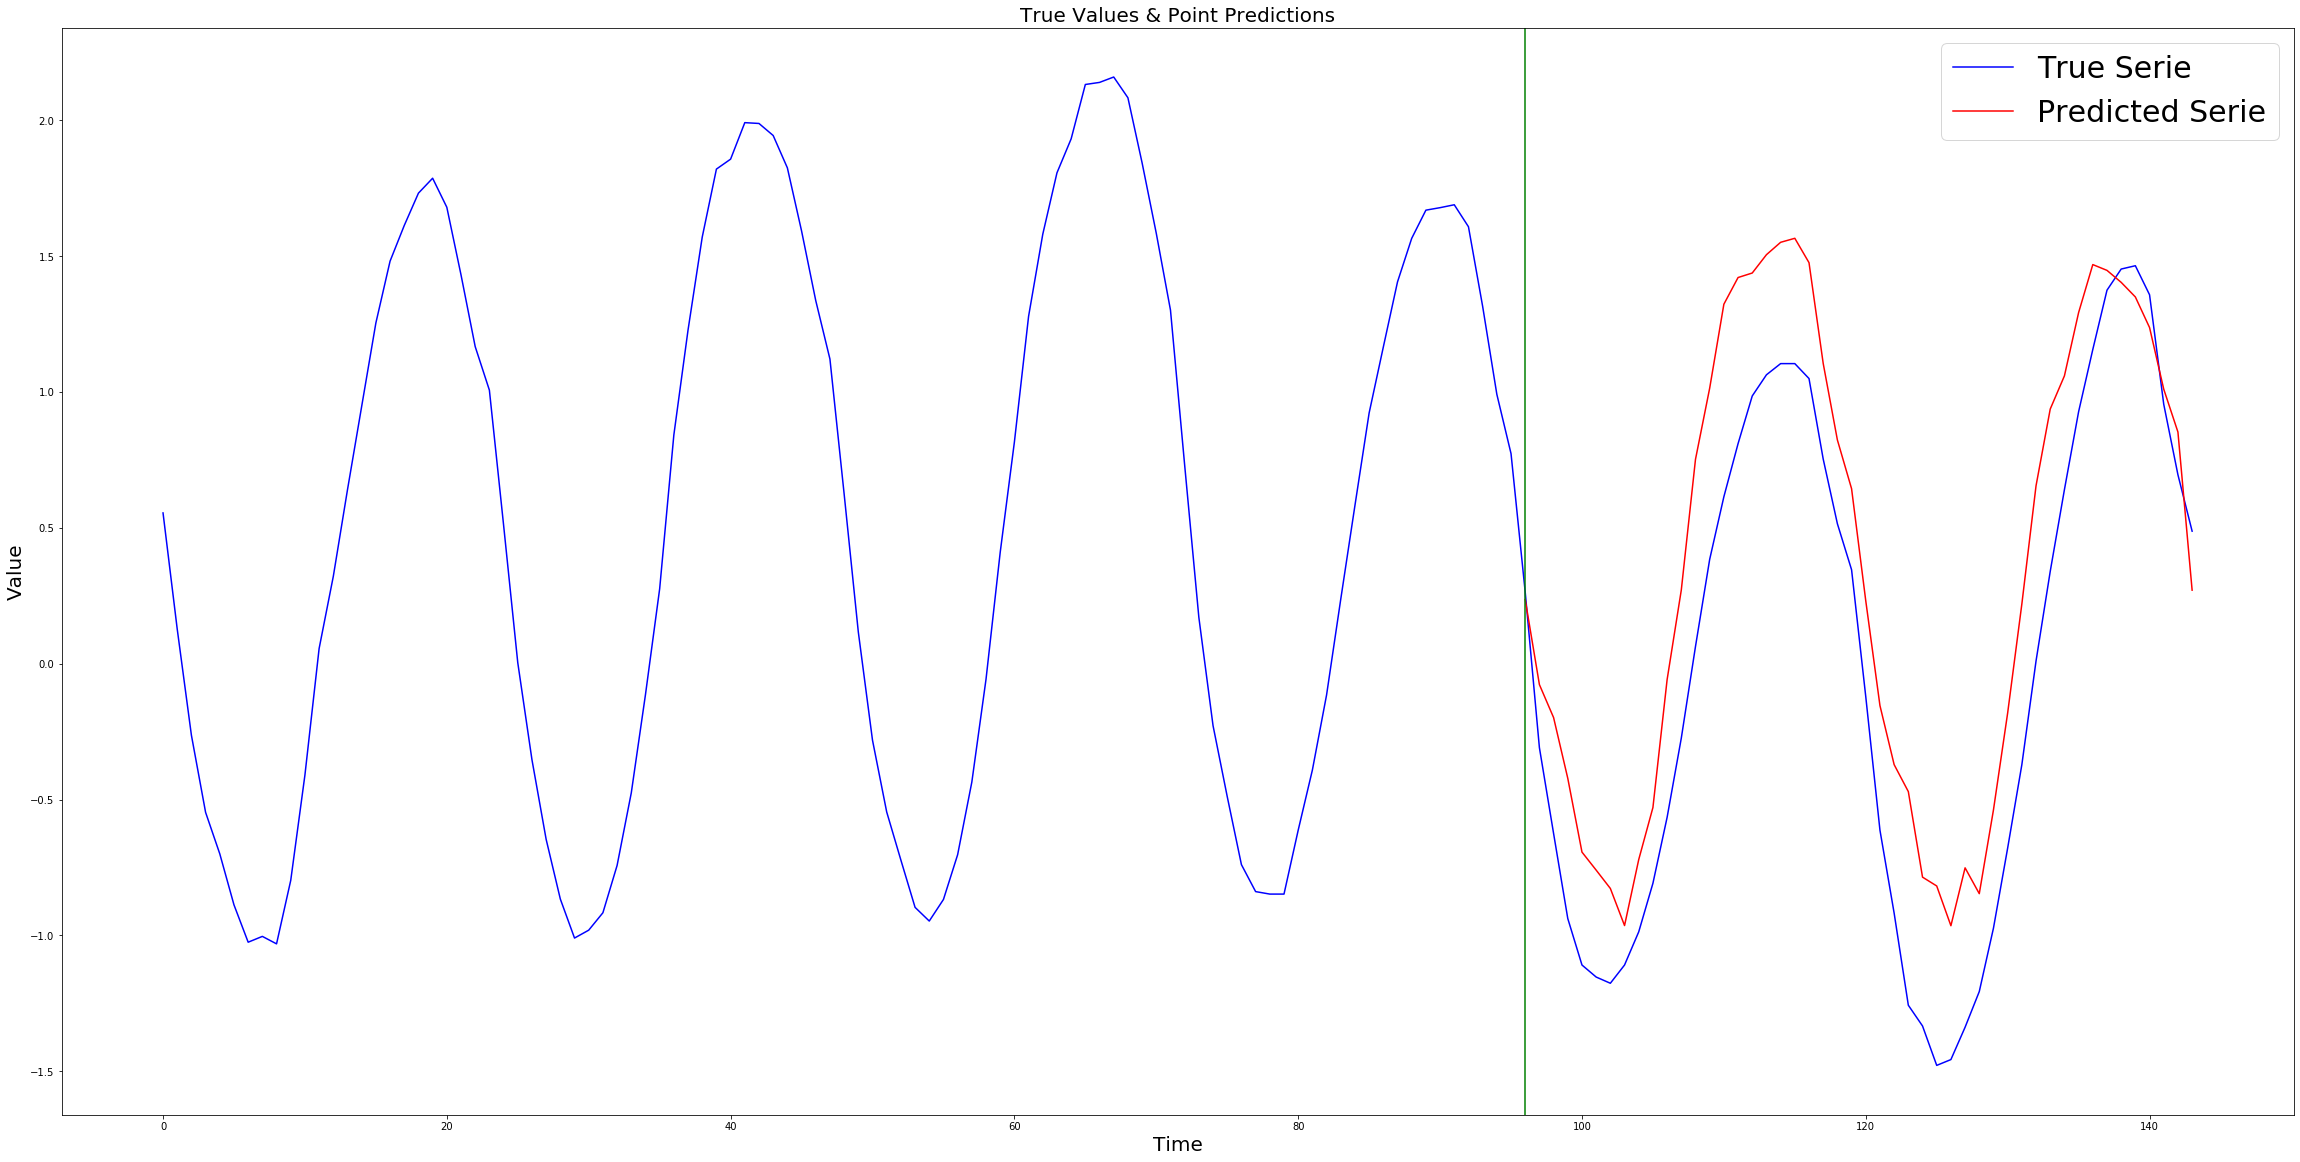

In [7]:
IDX = 1
#============ Predict Test
predictedY = model.predict(test_x[:BATCH_SIZE,:].reshape(BATCH_SIZE, LOOKBACK, 1))
#plot_series(test_x, test_y, predictedY, series_num=10)
plot_serie_and_prediction(test_x, test_y, predictedY, serie_indx=IDX)

# Evaluate A Model Against An Error Function

In [8]:
model = M4Model(batch_size=BATCH_SIZE)
model.load('../models/11/architecture.json','../models/11/weights.h5')

train_error = evaluate_model(model, train_x, train_y, smape)
print(train_error)

test_error = evaluate_model(model, test_x, test_y, smape)
print(test_error)

validate_error = evaluate_model(model, validate_x, validate_y, smape)
print(validate_error)

Loaded model from disk


ValueError: Error when checking input: expected lstm_1_input to have shape (48, 1) but got array with shape (96, 1)